# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fresty Tania Stearine
- **Email:** frestytania@gmail.com
- **ID Dicoding:** fresty_tania

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bike sharing selama tahun 2011-2012?
- Faktor apa saja yang membuat jumlah bike sharing meningkat?

## Import Semua Packages/Library yang Digunakan

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
df_day = pd.read_csv("./Bike-sharing-dataset/day.csv")
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
df_hour = pd.read_csv("./Bike-sharing-dataset/hour.csv")
df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Assessing Data

Pertama, dicek data yang mengandung nilai null menggunakan method `isnull()`

In [4]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari hasil pengecekan, terlihat bahwa tidak ada kolom yang memiliki data bernilai null. Selanjutnya, akan dicek apakah data memiliki baris duplikat menggunakan method `.duplicated()`

In [5]:
df_hour.duplicated().sum()

0

Hasil dari kedua pengecekan tersebut menunjukkan bahwa data relatif bersih: tidak ada nilai null ataupun baris duplikat. <br>

### Cleaning Data

Untuk percobaan ini, tidak dilakukan cleaning data, baik imputasi ataupun penghilangan outlier karena data sudah relatif bersih. Meskipun std untuk beberapa kolom cukup besar, data "outlier" tersebut tetap saya perhitungkan untuk eksplorasi ini

## Exploratory Data Analysis (EDA)

### Describe Each DataFrame

In [7]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan penjelasan README dan bentuk data, kolom-kolom seperti `weathersit` dan `season` merupakan data kategorikal yang direpresentasikan dengan integer. Data-data seperti `yr`, `mnth`, `hr` merupakan data ordinal yang menunjukkan waktu dengan representasi integer juga, sedangkan `temp`, `hump`, `windspeed` merupakan data rasio. Dari deskripsi data, tidak ada angka di luar range (yang sudah ditetapkan) dan mean median tidak ada yang terlampau jauh.

### Group By Season

In [25]:
df_day.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


### Group By Weather

In [26]:
df_day.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bike sharing selama tahun 2011-2012?

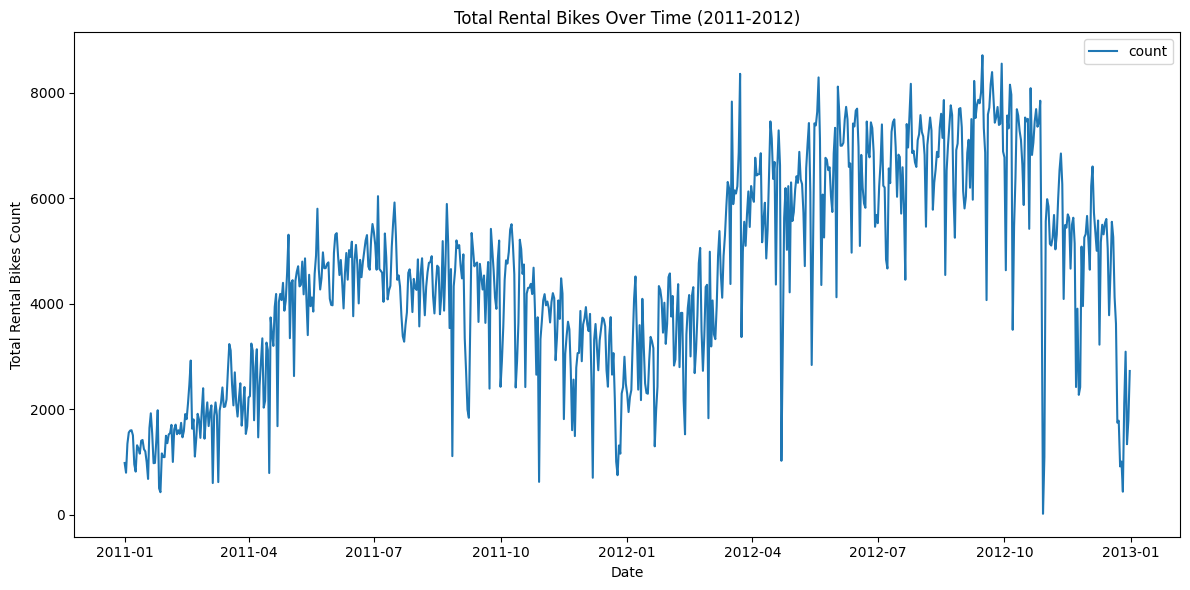

In [32]:
# Convert the 'dteday' column to datetime format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Create a line chart for 2011
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'], linestyle='-', label='count')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Rental Bikes Count')
plt.title('Total Rental Bikes Over Time (2011-2012)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas dan EDA "Group By Season", bike sharing meningkat pada musim panas dan kemarau, dan menurun pada musim dingin (salju). Jumlah sepeda rental pada tahun 2012 meningkat daripada tahun 2011, tetapi trennya juga kurang lebih sama

### Pertanyaan 2: Faktor apa saja yang membuat jumlah bike sharing meningkat?

Text(0.5, 1.0, 'Correlation matrix')

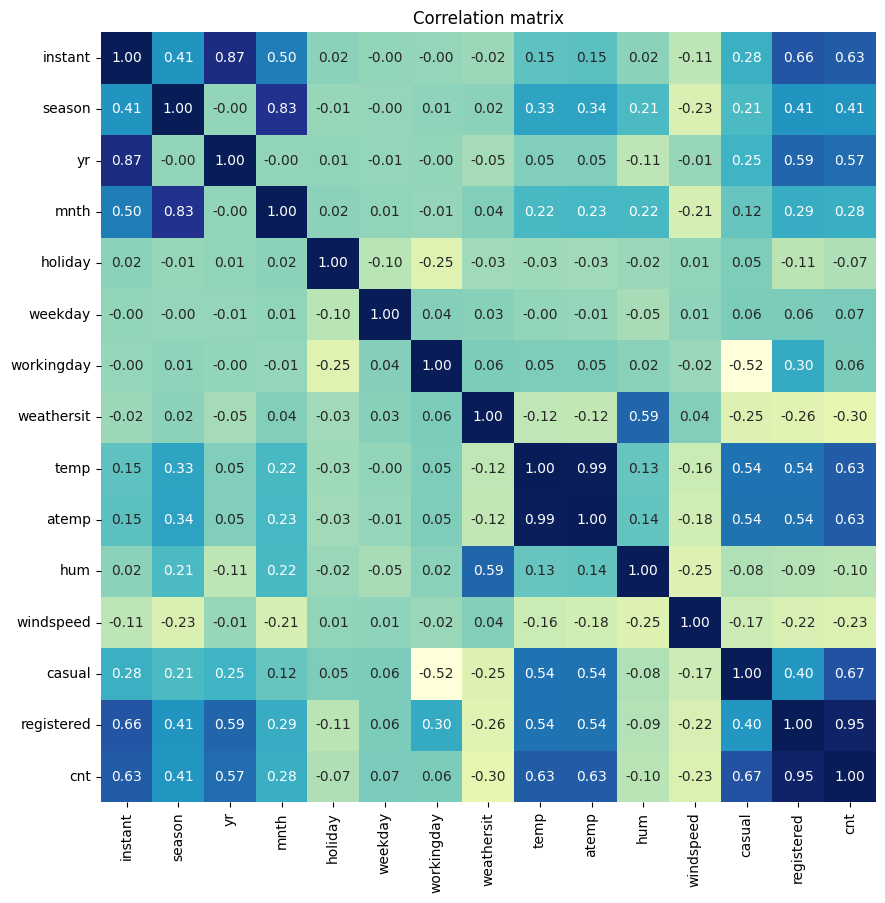

In [34]:
plt.figure(figsize=(10,10))

sns.heatmap(df_day.select_dtypes(np.number).corr(),
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df_day.select_dtypes(np.number).columns,
        yticklabels=df_day.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Faktor yang berkorelasi kuat dengan jumlah bike sharing adalah temperatur `temp` dan `atemp`

## Conclusion

- Selama 2011-2012, bike sharing meningkat pada bulan musim panas & kemarau dan menurun pada musim dingin
- Faktor yang membuat jumlah bike sharing meningkat adalah temperatur. Hal ini berkorelasi erat dengan conclusion pertama